In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

#### Descargar el set de datos de caballos y humanos

In [2]:
setattr(tfds.image_classification.horses_or_humans, '_URL',"https://www.tensorflow.org/datasets/catalog/horses_or_humans")

Esta linea de arriba es solo necesaria si da algun error al cargar la linea de debajo, depende la version de tensorflow datasets que se tenga.

In [3]:
datos, metadatos = tfds.load('horses_or_humans', as_supervised=True, with_info=True)

In [4]:
metadatos

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\sebas\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }"""

#### Una forma de mostrar 5 ejemplos del set

image  label
0  [[[53, 55, 45], [46, 47, 40], [39, 40, 36], [3...      0
1  [[[255, 227, 204], [253, 226, 203], [251, 223,...      0
2  [[[157, 180, 202], [157, 180, 202], [157, 180,...      0
3  [[[12, 14, 14], [13, 15, 16], [15, 16, 17], [1...      0
4  [[[60, 72, 83], [59, 70, 75], [57, 64, 58], [5...      0
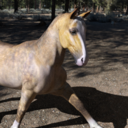
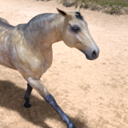
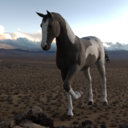
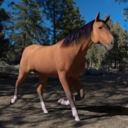
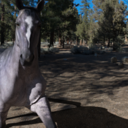

In [5]:
tfds.as_dataframe(datos['train'].take(5), metadatos)

##### Otra forma de mostrar ejemplos del set

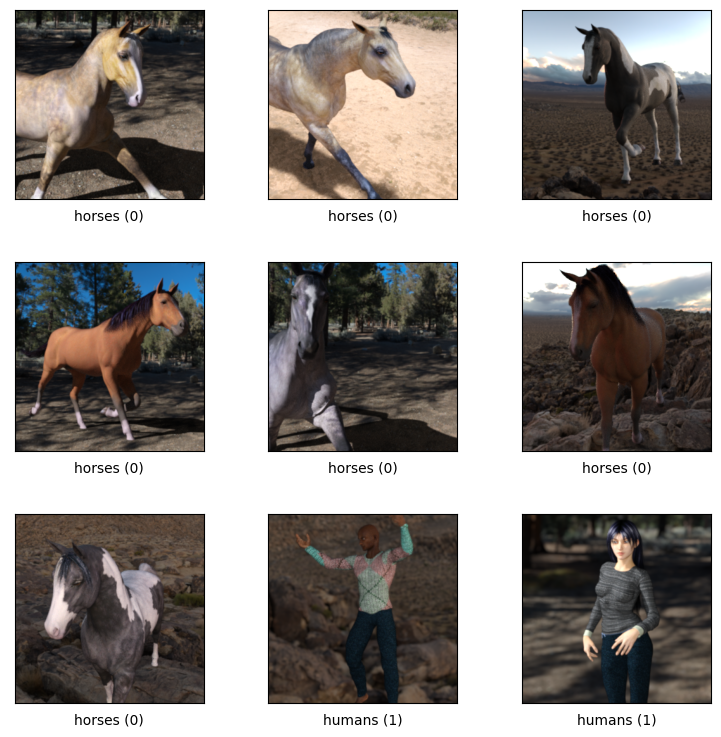

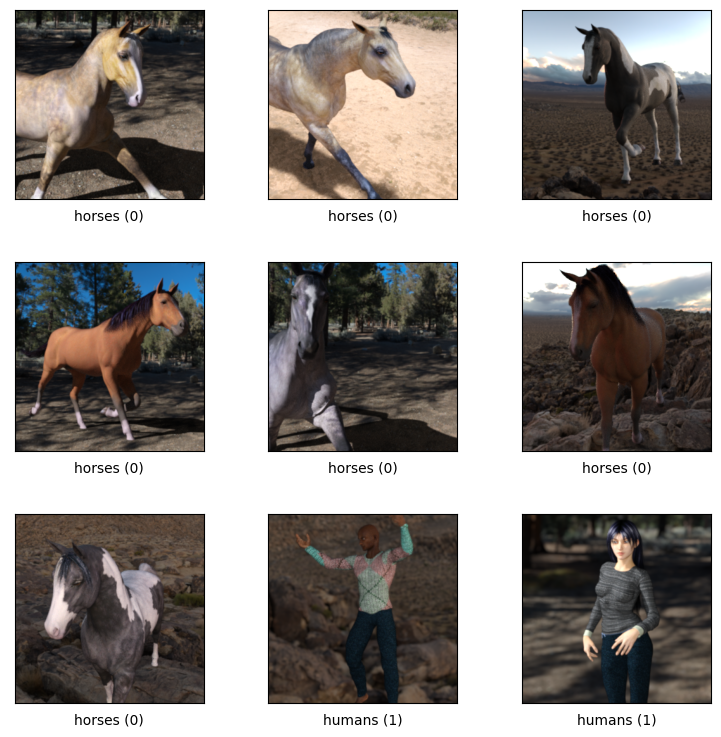

In [6]:
tfds.show_examples(datos['train'], metadatos)

#### Manipulamos los datos para poder entrenarlos comodamente

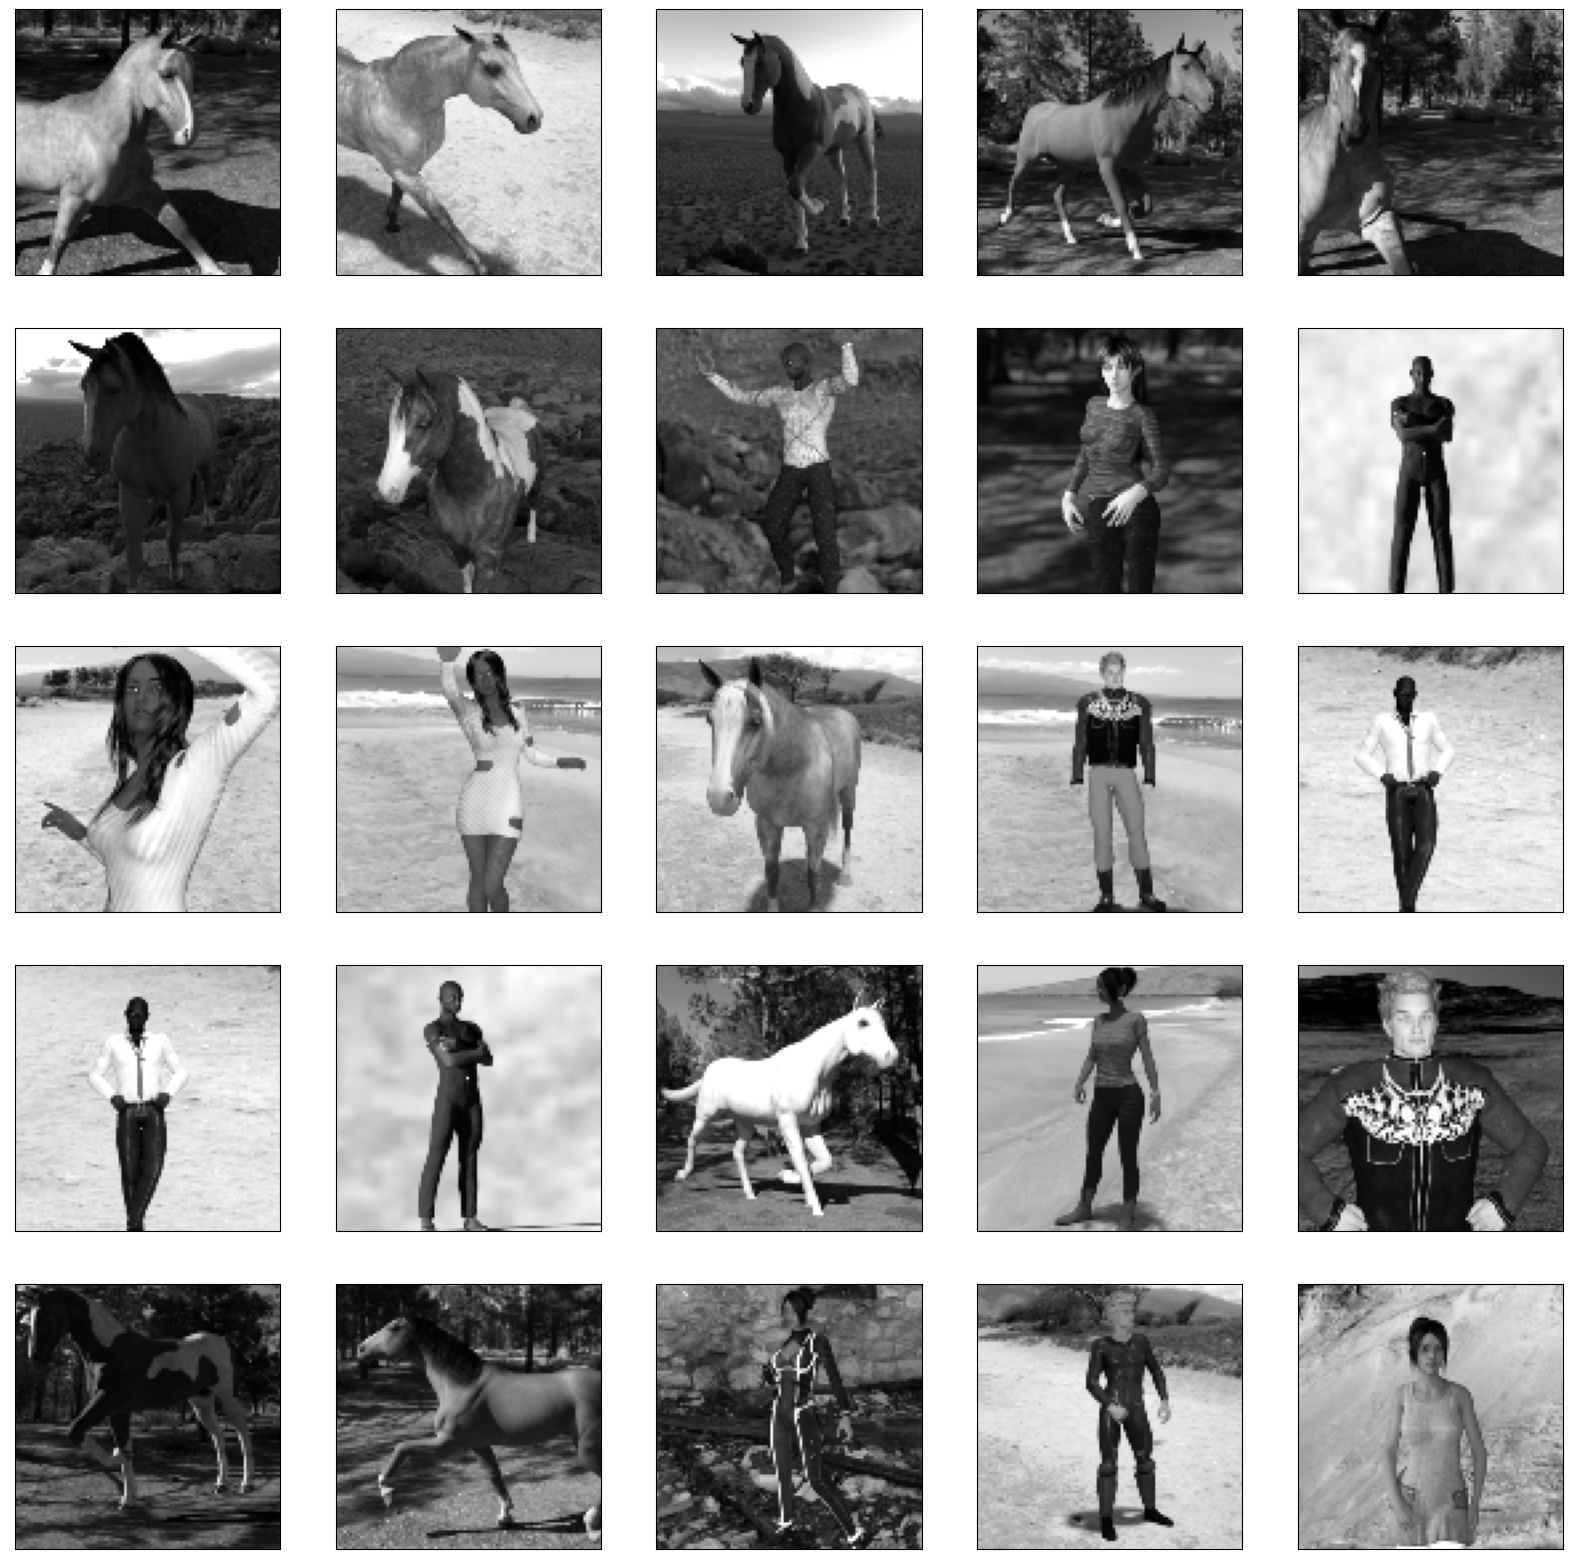

In [7]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))                                     #Tamaño

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG)) #Cambiamos el tamaño de las imagenes
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)             #Cambiamos el color a escala de grises
  plt.subplot(5, 5, i+1)                                        #Con esto le digo que me de una matriz de 5x5 que muestre imagenes
  plt.xticks([])                                                #En este dataset no estan los ticks pero si el nombre (human o horse) asi que nos deshacemos de ellos
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')                               #Con este cmap indicamos que solo manejaremos un único canal de color

#### Creamos la variable para entrenamiento

In [8]:
datos_entrenamiento = []

In [9]:
for i, (imagen, etiqueta) in enumerate(datos['train']):          #Iteramos todos los datos y hacemos los arreglos/modificaciones a ellos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))  
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)             #Cambiar tamaño a 100,100,1, ya que debemos indicar a tensorflow que estamos usando solo un canal de color
  datos_entrenamiento.append([imagen, etiqueta])                 #Agrego la imagen modificada al arreglo

Imprimo una imagen

In [10]:
datos_entrenamiento[0]                                           

[array([[[ 46],
         [ 31],
         [ 57],
         ...,
         [ 26],
         [ 24],
         [ 17]],
 
        [[ 49],
         [ 22],
         [ 40],
         ...,
         [ 22],
         [ 18],
         [ 15]],
 
        [[ 61],
         [ 41],
         [ 51],
         ...,
         [ 26],
         [ 16],
         [ 12]],
 
        ...,
 
        [[114],
         [ 73],
         [113],
         ...,
         [ 24],
         [ 33],
         [118]],
 
        [[125],
         [ 91],
         [ 84],
         ...,
         [ 30],
         [127],
         [130]],
 
        [[131],
         [126],
         [101],
         ...,
         [ 90],
         [130],
         [131]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=0>]

Longitud del arreglo

In [11]:
len(datos_entrenamiento)                                         

1027

#### Preparamos las variables X(entradas) y y(etiquetas) separadas

In [12]:
X = []                                       #imagenes de entrada (pixeles)
y = []                                       #etiquetas (humanos o caballos)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [13]:
X

[array([[[ 46],
         [ 31],
         [ 57],
         ...,
         [ 26],
         [ 24],
         [ 17]],
 
        [[ 49],
         [ 22],
         [ 40],
         ...,
         [ 22],
         [ 18],
         [ 15]],
 
        [[ 61],
         [ 41],
         [ 51],
         ...,
         [ 26],
         [ 16],
         [ 12]],
 
        ...,
 
        [[114],
         [ 73],
         [113],
         ...,
         [ 24],
         [ 33],
         [118]],
 
        [[125],
         [ 91],
         [ 84],
         ...,
         [ 30],
         [127],
         [130]],
 
        [[131],
         [126],
         [101],
         ...,
         [ 90],
         [130],
         [131]]], dtype=uint8),
 array([[[220],
         [221],
         [219],
         ...,
         [ 96],
         [ 99],
         [ 98]],
 
        [[226],
         [222],
         [222],
         ...,
         [107],
         [102],
         [102]],
 
        [[227],
         [224],
         [230],
         ...,
      

#### Normalizamos
Esto lo hacemos para tener valores entre 0 y 1 y no entre 0 y 255

In [14]:
import numpy as np

X = np.array(X).astype(float) / 255                      #Normalizacion

In [15]:
y            #Tiene puros tensores

[<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64

Convierto esto en arreglo simple para solo saber si es 0 o 1

In [16]:
y = np.array(y)               #Arreglo de numpy simple

El arreglo tiene 1027 entradas con imagenes de 100x100 en escala de grises

In [17]:
X.shape

(1027, 100, 100, 1)

#### Entrenamos los modelos

Probaremos primero con tres modelos distintos sin aumento de datos

In [18]:
#Usan sigmoid como salida (en lugar de softmax) para mostrar como podria funcionar con dicha funcion de activacion.
#Sigmoid regresa siempre datos entre 0 y 1. Realizamos el entrenamiento para al final considerar que si la respuesta se
#acerca a 0, es un horse, y si se acerca a 1, es un human.

modeloDenso = tf.keras.models.Sequential([                   
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(100, activation='relu'),             #Dos capas densas de 100 neuronas cada una con activación relu
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')             #Como solo tenemos 2 opciones, utilizamos la activación sigmoid que regresa valores 0 o 1
])
 
modeloCNN = tf.keras.models.Sequential([                     #Red Neuronal Convolucional
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([                     #Red Neuronal Convolucional modificada
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),                                #Añadimos un Dropout de 0.5 antes de la capa densa
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

Compilamos los modelos

In [19]:
modeloDenso.compile(optimizer='adam',                 
                    loss='binary_crossentropy',       #Usamos esto para la funcion de perdida ya que aplica para resultados binarios 
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

Agrego esta libreria para ver facilmente las gráficas

In [20]:
import sys
sys.version

'3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]'

In [21]:
from tensorflow.keras.callbacks import TensorBoard

Entrenamos el modelo denso

In [22]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')      #Variable para este entrenamiento en la que nombraremos una carpeta, cada entrenamiento tendra su única carpeta para luego visualizar
modeloDenso.fit(X, y, batch_size=32,                      #Tamaño del lote es 32
                validation_split=0.20,                    #Dejamos un 20% para pruebas
                epochs=25,                                #Cantidad de epocas
                callbacks=[tensorboardDenso])             #Arreglo de callbacks para que despues de cada una de las epocas guarde en disco el resultado

Epoch 1/25
26/26 [==============================] - 1s 22ms/step - loss: 0.8454 - accuracy: 0.5749 - val_loss: 0.5446 - val_accuracy: 0.7184
Epoch 2/25
26/26 [==============================] - 0s 13ms/step - loss: 0.5209 - accuracy: 0.7333 - val_loss: 0.4754 - val_accuracy: 0.7330
Epoch 3/25
26/26 [==============================] - 0s 14ms/step - loss: 0.4440 - accuracy: 0.7808 - val_loss: 0.4201 - val_accuracy: 0.7816
Epoch 4/25
26/26 [==============================] - 0s 17ms/step - loss: 0.4327 - accuracy: 0.7820 - val_loss: 0.3918 - val_accuracy: 0.8107
Epoch 5/25
26/26 [==============================] - 0s 16ms/step - loss: 0.3489 - accuracy: 0.8465 - val_loss: 0.3582 - val_accuracy: 0.8398
Epoch 6/25
26/26 [==============================] - 0s 15ms/step - loss: 0.3243 - accuracy: 0.8624 - val_loss: 0.4878 - val_accuracy: 0.7330
Epoch 7/25
26/26 [==============================] - 0s 14ms/step - loss: 0.3818 - accuracy: 0.8210 - val_loss: 0.4041 - val_accuracy: 0.7864
Epoch 8/25
26

Entrenamos el modelo convolucional

In [23]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')        
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.20,
                epochs=25,
                callbacks=[tensorboardCNN])

Epoch 1/25
26/26 [==============================] - 9s 287ms/step - loss: 0.5087 - accuracy: 0.7491 - val_loss: 0.2074 - val_accuracy: 0.9223
Epoch 2/25
26/26 [==============================] - 8s 291ms/step - loss: 0.1927 - accuracy: 0.9281 - val_loss: 0.1626 - val_accuracy: 0.9272
Epoch 3/25
26/26 [==============================] - 6s 247ms/step - loss: 0.1009 - accuracy: 0.9635 - val_loss: 0.0860 - val_accuracy: 0.9709
Epoch 4/25
26/26 [==============================] - 6s 248ms/step - loss: 0.0484 - accuracy: 0.9878 - val_loss: 0.0906 - val_accuracy: 0.9612
Epoch 5/25
26/26 [==============================] - 7s 251ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0339 - val_accuracy: 0.9951
Epoch 6/25
26/26 [==============================] - 6s 246ms/step - loss: 0.0601 - accuracy: 0.9805 - val_loss: 0.0984 - val_accuracy: 0.9563
Epoch 7/25
26/26 [==============================] - 7s 259ms/step - loss: 0.0346 - accuracy: 0.9854 - val_loss: 0.0471 - val_accuracy: 0.9854
Epoch 

Entrenamos el modelo convolucional modificado

In [24]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.20,
                epochs=25,
                callbacks=[tensorboardCNN2])

Epoch 1/25
26/26 [==============================] - 9s 272ms/step - loss: 0.4767 - accuracy: 0.8002 - val_loss: 0.3286 - val_accuracy: 0.9078
Epoch 2/25
26/26 [==============================] - 7s 261ms/step - loss: 0.2943 - accuracy: 0.8940 - val_loss: 0.2241 - val_accuracy: 0.8981
Epoch 3/25
26/26 [==============================] - 7s 265ms/step - loss: 0.1811 - accuracy: 0.9391 - val_loss: 0.1469 - val_accuracy: 0.9466
Epoch 4/25
26/26 [==============================] - 7s 254ms/step - loss: 0.1068 - accuracy: 0.9647 - val_loss: 0.0817 - val_accuracy: 0.9660
Epoch 5/25
26/26 [==============================] - 6s 245ms/step - loss: 0.1175 - accuracy: 0.9659 - val_loss: 0.0746 - val_accuracy: 0.9757
Epoch 6/25
26/26 [==============================] - 7s 252ms/step - loss: 0.0686 - accuracy: 0.9744 - val_loss: 0.0597 - val_accuracy: 0.9757
Epoch 7/25
26/26 [==============================] - 7s 256ms/step - loss: 0.0285 - accuracy: 0.9951 - val_loss: 0.0261 - val_accuracy: 0.9903
Epoch 

#### Hacemos el aumento de datos

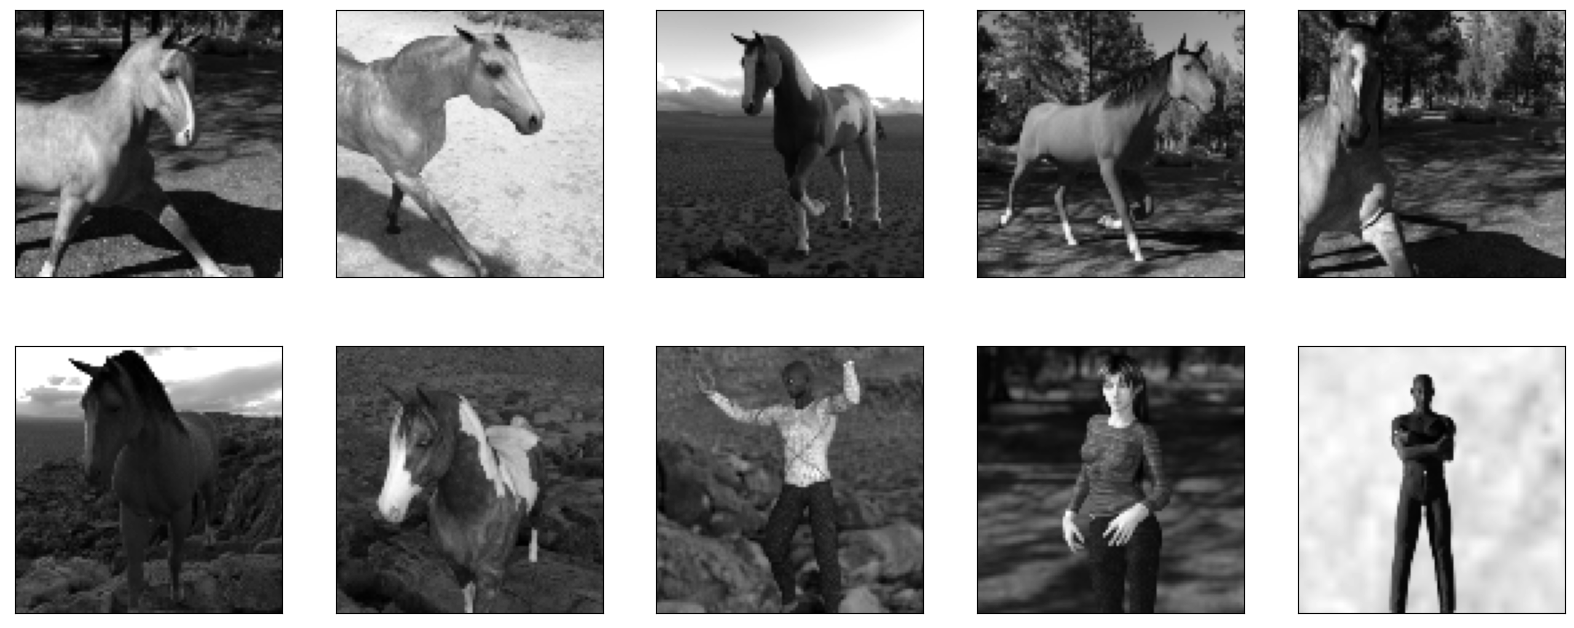

In [25]:
plt.figure(figsize=(20, 8))                          #Tamaño
for i in range(10):                                  #Iteramos 10 imagenes
  plt.subplot(2, 5, i+1)                             #2 fila de 5 columnas
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")    #Mostramos la imagen y hacemos reshape para no tener mas de 2 dimensiones

Importamos el generador de datos y creamos el generador

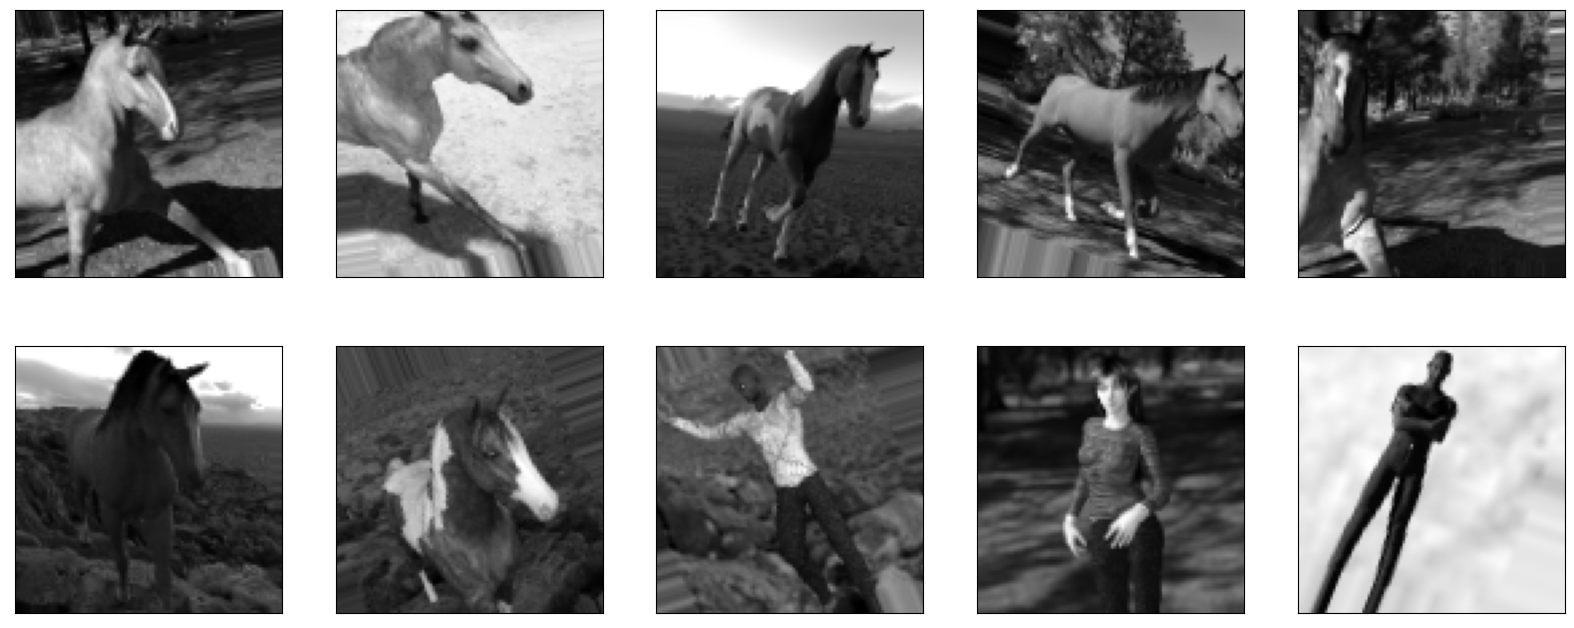

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,          #Rotamos la imagen cierto angulo
    width_shift_range=0.1,      #Mover la imagen a los lados
    height_shift_range=0.1,     #Mover la imagen arriba o abajo
    shear_range=10,             #Inclinacion de la imagen
    horizontal_flip=True,       #Rotaciones horizontales
)  

datagen.fit(X)                  #Con esto toma todas las imagenes para entender de que manera hara las transformaciones    

plt.figure(figsize=(20,8))      #Tamaño

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False): #Ponemos shuffle = false para que nos las de en orden
  for i in range(10):           #10 imagenes
    plt.subplot(2, 5, i+1)      
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

#### Entrenamos los nuevos modelos con aumento de datos

In [27]:
#Los modelos son iguales, lo unico que cambian son los nombres
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [29]:
len(X)-821

206

In [30]:
len(X) * .80  #821
len(X) - 821  #206

X_entrenamiento = X[:820]
X_validacion = X[820:]

y_entrenamiento = y[:820]
y_validacion = y[820:]

In [31]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [32]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=25, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

Epoch 1/25
26/26 [==============================] - 2s 47ms/step - loss: 0.9936 - accuracy: 0.5244 - val_loss: 0.6131 - val_accuracy: 0.5845
Epoch 2/25
26/26 [==============================] - 1s 42ms/step - loss: 0.6908 - accuracy: 0.5805 - val_loss: 0.7096 - val_accuracy: 0.5652
Epoch 3/25
26/26 [==============================] - 1s 40ms/step - loss: 0.6473 - accuracy: 0.6293 - val_loss: 0.7000 - val_accuracy: 0.5845
Epoch 4/25
26/26 [==============================] - 1s 40ms/step - loss: 0.7440 - accuracy: 0.6232 - val_loss: 0.5870 - val_accuracy: 0.6763
Epoch 5/25
26/26 [==============================] - 1s 42ms/step - loss: 0.6209 - accuracy: 0.6451 - val_loss: 0.5285 - val_accuracy: 0.7536
Epoch 6/25
26/26 [==============================] - 1s 41ms/step - loss: 0.6626 - accuracy: 0.6171 - val_loss: 0.8821 - val_accuracy: 0.5362
Epoch 7/25
26/26 [==============================] - 1s 41ms/step - loss: 0.7358 - accuracy: 0.5720 - val_loss: 0.6432 - val_accuracy: 0.6087
Epoch 8/25
26

In [33]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=25, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

Epoch 1/25
26/26 [==============================] - 7s 238ms/step - loss: 0.6934 - accuracy: 0.5805 - val_loss: 0.6236 - val_accuracy: 0.8068
Epoch 2/25
26/26 [==============================] - 6s 228ms/step - loss: 0.5056 - accuracy: 0.7573 - val_loss: 0.2244 - val_accuracy: 0.8986
Epoch 3/25
26/26 [==============================] - 6s 221ms/step - loss: 0.3505 - accuracy: 0.8463 - val_loss: 0.2186 - val_accuracy: 0.9179
Epoch 4/25
26/26 [==============================] - 6s 217ms/step - loss: 0.3393 - accuracy: 0.8415 - val_loss: 0.2915 - val_accuracy: 0.8599
Epoch 5/25
26/26 [==============================] - 6s 216ms/step - loss: 0.3146 - accuracy: 0.8780 - val_loss: 0.2883 - val_accuracy: 0.8744
Epoch 6/25
26/26 [==============================] - 6s 214ms/step - loss: 0.2960 - accuracy: 0.8768 - val_loss: 0.1605 - val_accuracy: 0.9324
Epoch 7/25
26/26 [==============================] - 6s 217ms/step - loss: 0.2647 - accuracy: 0.8951 - val_loss: 0.1840 - val_accuracy: 0.9227
Epoch 

In [34]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=25, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

Epoch 1/25
26/26 [==============================] - 8s 269ms/step - loss: 0.6346 - accuracy: 0.6378 - val_loss: 0.4403 - val_accuracy: 0.7633
Epoch 2/25
26/26 [==============================] - 7s 265ms/step - loss: 0.4313 - accuracy: 0.8012 - val_loss: 0.2530 - val_accuracy: 0.9082
Epoch 3/25
26/26 [==============================] - 6s 240ms/step - loss: 0.4006 - accuracy: 0.8183 - val_loss: 0.3233 - val_accuracy: 0.8357
Epoch 4/25
26/26 [==============================] - 6s 237ms/step - loss: 0.3463 - accuracy: 0.8524 - val_loss: 0.1894 - val_accuracy: 0.9420
Epoch 5/25
26/26 [==============================] - 6s 237ms/step - loss: 0.3625 - accuracy: 0.8415 - val_loss: 0.2362 - val_accuracy: 0.8986
Epoch 6/25
26/26 [==============================] - 6s 243ms/step - loss: 0.2961 - accuracy: 0.8720 - val_loss: 0.3866 - val_accuracy: 0.8744
Epoch 7/25
26/26 [==============================] - 6s 238ms/step - loss: 0.2416 - accuracy: 0.8988 - val_loss: 0.3787 - val_accuracy: 0.8454
Epoch 

In [35]:
modeloCNN2_AD.save('humanos-caballos.h5')

In [37]:
!mkdir carpeta_salida

In [38]:
!tensorflowjs_converter --input_format keras humanos-caballos.h5 carpeta_salida

Ejecución de las gráficas

In [39]:
%load_ext tensorboard

In [40]:
%tensorboard --logdir logs